In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [29]:
##Data Preprocessing
#Image Augmentation
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_set = train_datagen.flow_from_directory(
        'training_set', 
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = train_datagen.flow_from_directory(
        'test_set',
        target_size=(64, 64),  
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [31]:
#Making the CNN
cnn=tf.keras.models.Sequential()

In [32]:
#Convolving Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [33]:
#Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [36]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [37]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [38]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
cnn.fit(x=train_set,validation_data=test_set,epochs=25)

Epoch 1/25
250/250 [==============================] - 75s 295ms/step - loss: 0.6892 - accuracy: 0.5386 - val_loss: 0.6759 - val_accuracy: 0.5910
Epoch 2/25
250/250 [==============================] - 102s 409ms/step - loss: 0.6661 - accuracy: 0.6012 - val_loss: 0.6605 - val_accuracy: 0.5995
Epoch 3/25
250/250 [==============================] - 94s 376ms/step - loss: 0.6379 - accuracy: 0.6385 - val_loss: 0.6282 - val_accuracy: 0.6445
Epoch 4/25
250/250 [==============================] - 93s 371ms/step - loss: 0.6121 - accuracy: 0.6658 - val_loss: 0.6255 - val_accuracy: 0.6640
Epoch 5/25
250/250 [==============================] - 102s 409ms/step - loss: 0.6071 - accuracy: 0.6695 - val_loss: 0.6016 - val_accuracy: 0.6740
Epoch 6/25
250/250 [==============================] - 109s 436ms/step - loss: 0.5871 - accuracy: 0.6850 - val_loss: 0.5814 - val_accuracy: 0.6995
Epoch 7/25
250/250 [==============================] - 104s 417ms/step - loss: 0.5832 - accuracy: 0.6909 - val_loss: 0.5742 - va

In [54]:
from keras.preprocessing import image
test_image=image.load_img('single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
if result[0][0]==1:
    prediction='DOG'
else:
    prediction='CAT'

1/1 [==============================] - 0s 40ms/step


Text(0.5, 1.0, 'DOG')

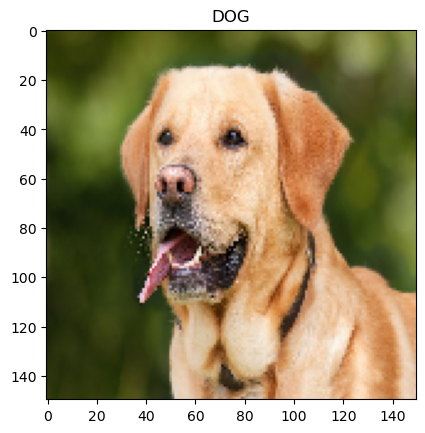

In [55]:
from keras.preprocessing import image
image=image.load_img('single_prediction/cat_or_dog_1.jpg',target_size=(150,150))
plt.imshow(image)
plt.title(prediction)